In [3]:
# Voice UPI Intent Classification Model
# Lightweight model for predicting user intents in voice-based UPI transactions

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'c:\Users\jefin\Desktop\Code\VoiceUPI\Backend\Intent_classifier\voice_upi_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head(10))

# Check for any leading/trailing spaces in column names
df.columns = df.columns.str.strip()
print("\nCleaned column names:", df.columns.tolist())

print("\nIntent distribution:")
print(df['intent'].value_counts())
print("\nDataset info:")
print(df.info())

Dataset Shape: (848, 2)

Column names: ['text', ' intent']

First few rows:
                                       text            intent
0      send 500 to mobile number 9912381230   transfer_money 
1                use upi to send 250 to dad    transfer_money
2            i need to pay ravi 250 via upi    transfer_money
3        do i have money for a 500 purchase     check_balance
4                         request for money    request_money 
5  i need to transfer 1500 to arjun via upi    transfer_money
6                                  send 500    transfer_money
7                   send money to jefin upi    transfer_money
8                     check account balance     check_balance
9                           current balance     check_balance

Cleaned column names: ['text', 'intent']

Intent distribution:
intent
check_balance      300
request_money      276
transfer_money     270
transfer_money       1
request_money        1
Name: count, dtype: int64

Dataset info:
<class 'pandas.

Cleaning and preprocessing data...

Cleaned Intent distribution:
intent
check_balance     300
request_money     277
transfer_money    271
Name: count, dtype: int64


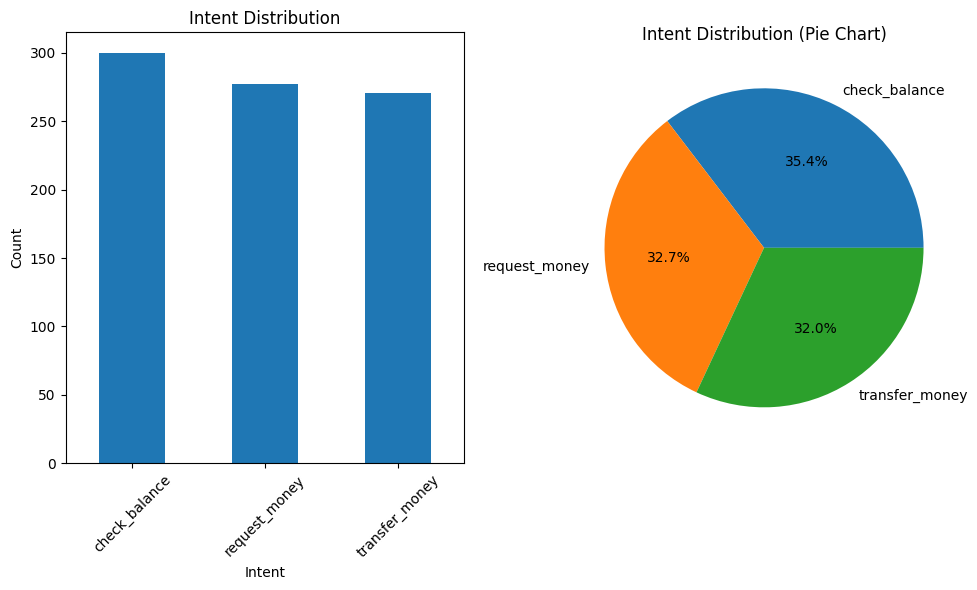


Null values in text: 0
Null values in intent: 0

Sample of cleaned text:
                                   text                          text_cleaned
0  send 500 to mobile number 9912381230  send 500 to mobile number 9912381230
1            use upi to send 250 to dad            use upi to send 250 to dad
2        i need to pay ravi 250 via upi        i need to pay ravi 250 via upi
3    do i have money for a 500 purchase    do i have money for a 500 purchase
4                     request for money                     request for money


In [4]:
# Data Cleaning and Preprocessing
print("Cleaning and preprocessing data...")

# Clean the intent column to remove trailing spaces
df['intent'] = df['intent'].str.strip()

# Check the distribution after cleaning
print("\nCleaned Intent distribution:")
print(df['intent'].value_counts())

# Plot intent distribution
plt.figure(figsize=(10, 6))
intent_counts = df['intent'].value_counts()
plt.subplot(1, 2, 1)
intent_counts.plot(kind='bar')
plt.title('Intent Distribution')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(intent_counts.values, labels=intent_counts.index, autopct='%1.1f%%')
plt.title('Intent Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

# Check for any null values
print(f"\nNull values in text: {df['text'].isnull().sum()}")
print(f"Null values in intent: {df['intent'].isnull().sum()}")

# Clean text data
def clean_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing whitespace
    text = text.strip()
    return text

# Apply text cleaning
df['text_cleaned'] = df['text'].apply(clean_text)

print("\nSample of cleaned text:")
print(df[['text', 'text_cleaned']].head())

In [5]:
# Train-Test Split
print("Splitting data into train and test sets...")

X = df['text_cleaned']
y = df['intent']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split across all classes
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set intent distribution:")
print(y_train.value_counts())
print(f"\nTest set intent distribution:")
print(y_test.value_counts())

Splitting data into train and test sets...
Training set size: 678
Test set size: 170

Training set intent distribution:
intent
check_balance     240
request_money     221
transfer_money    217
Name: count, dtype: int64

Test set intent distribution:
intent
check_balance     60
request_money     56
transfer_money    54
Name: count, dtype: int64


In [6]:
# Create Lightweight Intent Classification Model
print("Creating lightweight intent classification model...")

# Create a pipeline with TF-IDF vectorization and Logistic Regression
# This combination is lightweight, fast, and performs well for text classification
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,        # Limit features for lightweight model
        ngram_range=(1, 2),       # Use unigrams and bigrams
        stop_words='english',     # Remove common English stop words
        lowercase=True,           # Convert to lowercase
        strip_accents='ascii'     # Remove accents
    )),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,           # Sufficient iterations for convergence
        C=1.0                    # Regularization parameter
    ))
])

print("Model pipeline created successfully!")
print("Components:")
print("1. TF-IDF Vectorizer (max_features=5000, ngram_range=(1,2))")
print("2. Logistic Regression Classifier")
print("\nThis combination provides:")
print("✓ Fast training and prediction")
print("✓ Good accuracy for text classification")
print("✓ Small model size for deployment")
print("✓ Interpretable results")

Creating lightweight intent classification model...
Model pipeline created successfully!
Components:
1. TF-IDF Vectorizer (max_features=5000, ngram_range=(1,2))
2. Logistic Regression Classifier

This combination provides:
✓ Fast training and prediction
✓ Good accuracy for text classification
✓ Small model size for deployment
✓ Interpretable results


Training the model...
✓ Model training completed!

🎯 Model Accuracy: 0.9765 (97.65%)

📊 Detailed Classification Report:
                precision    recall  f1-score   support

 check_balance       1.00      1.00      1.00        60
 request_money       0.98      0.95      0.96        56
transfer_money       0.95      0.98      0.96        54

      accuracy                           0.98       170
     macro avg       0.98      0.98      0.98       170
  weighted avg       0.98      0.98      0.98       170


🔢 Confusion Matrix:
[[60  0  0]
 [ 0 53  3]
 [ 0  1 53]]


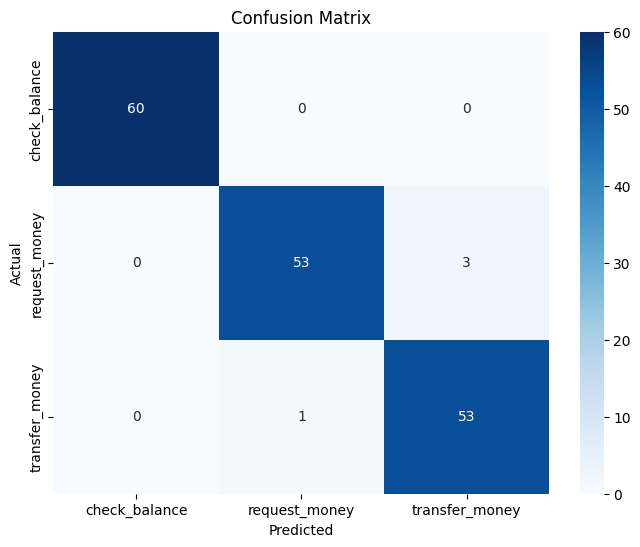

In [7]:
# Train and Evaluate the Model
print("Training the model...")

# Train the model
model_pipeline.fit(X_train, y_train)

print("✓ Model training completed!")

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=model_pipeline.classes_))

# Confusion Matrix
print("\n🔢 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model_pipeline.classes_, 
            yticklabels=model_pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Test the Model with Sample Predictions
print("🧪 Testing model with sample predictions...")

# Test samples
test_samples = [
    "send 1000 to my friend",
    "what is my current balance",
    "please ask dad for 500 rupees",
    "transfer money to mom",
    "check my account balance",
    "request 200 from john",
    "how much money do i have",
    "pay 150 to the grocery store"
]

print("\n📝 Sample Predictions:")
print("-" * 60)
for sample in test_samples:
    prediction = model_pipeline.predict([sample])[0]
    confidence = max(model_pipeline.predict_proba([sample])[0])
    print(f"Text: '{sample}'")
    print(f"Predicted Intent: {prediction}")
    print(f"Confidence: {confidence:.3f}")
    print("-" * 60)

# Feature importance analysis
print("\n🔍 Most Important Features for Each Class:")
feature_names = model_pipeline.named_steps['tfidf'].get_feature_names_out()
classifier = model_pipeline.named_steps['classifier']

for i, class_name in enumerate(classifier.classes_):
    # Get top 10 features for this class
    top_indices = classifier.coef_[i].argsort()[-10:][::-1]
    top_features = [feature_names[idx] for idx in top_indices]
    print(f"\n{class_name.upper()}:")
    print(", ".join(top_features))

🧪 Testing model with sample predictions...

📝 Sample Predictions:
------------------------------------------------------------
Text: 'send 1000 to my friend'
Predicted Intent: transfer_money
Confidence: 0.733
------------------------------------------------------------
Text: 'what is my current balance'
Predicted Intent: check_balance
Confidence: 0.921
------------------------------------------------------------
Text: 'please ask dad for 500 rupees'
Predicted Intent: request_money
Confidence: 0.708
------------------------------------------------------------
Text: 'transfer money to mom'
Predicted Intent: transfer_money
Confidence: 0.589
------------------------------------------------------------
Text: 'check my account balance'
Predicted Intent: check_balance
Confidence: 0.969
------------------------------------------------------------
Text: 'request 200 from john'
Predicted Intent: request_money
Confidence: 0.992
------------------------------------------------------------
Text: 'h

In [9]:
# Save the Model for Deployment
print("💾 Saving the trained model...")

# Save the complete pipeline
model_filename = 'voice_upi_intent_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model_pipeline, f)

print(f"✓ Model saved as '{model_filename}'")

# Get model size
import os
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Size in MB
print(f"📏 Model size: {model_size:.2f} MB")

# Create a simple prediction function
def predict_intent(text):
    """Predict intent for given text"""
    cleaned_text = clean_text(text)
    prediction = model_pipeline.predict([cleaned_text])[0]
    confidence = max(model_pipeline.predict_proba([cleaned_text])[0])
    return {
        'intent': prediction,
        'confidence': float(confidence),
        'input_text': text
    }

# Test the saved function
print("\n🧪 Testing the prediction function:")
test_text = "send 500 to my brother"
result = predict_intent(test_text)
print(f"Input: '{test_text}'")
print(f"Result: {result}")

print("\n✅ Model is ready for deployment!")

💾 Saving the trained model...
✓ Model saved as 'voice_upi_intent_model.pkl'
📏 Model size: 0.04 MB

🧪 Testing the prediction function:
Input: 'send 500 to my brother'
Result: {'intent': 'transfer_money', 'confidence': 0.6787427148700107, 'input_text': 'send 500 to my brother'}

✅ Model is ready for deployment!
